In [1]:
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv('data.csv') 
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,Y
1,LP001385,Male,No,0,Graduate,No,5316,0.0,136.0,360.0,1.0,Urban,Y
2,LP001926,Male,Yes,0,Graduate,No,3704,2000.0,120.0,360.0,1.0,Rural,Y
3,LP001144,Male,Yes,0,Graduate,No,5821,0.0,144.0,360.0,1.0,Urban,Y
4,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            430 non-null    object 
 1   Gender             420 non-null    object 
 2   Married            427 non-null    object 
 3   Dependents         416 non-null    object 
 4   Education          430 non-null    object 
 5   Self_Employed      410 non-null    object 
 6   ApplicantIncome    430 non-null    int64  
 7   CoapplicantIncome  430 non-null    float64
 8   LoanAmount         414 non-null    float64
 9   Loan_Amount_Term   422 non-null    float64
 10  Credit_History     394 non-null    float64
 11  Property_Area      430 non-null    object 
 12  Loan_Status        430 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.8+ KB


In [5]:
# encoding
train_df['Gender']= train_df['Gender'].map({'Male':0, 'Female':1})
train_df['Married']= train_df['Married'].map({'No':0, 'Yes':1})
train_df['Loan_Status']= train_df['Loan_Status'].map({'N':0, 'Y':1})

In [7]:
# remove nulll values

# train_df.isnull().sum()
train_df = train_df.dropna()

In [8]:
## choosing columns
X = train_df[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']]
y = train_df.Loan_Status

In [9]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)

In [10]:
## training a model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state=5)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, random_state=5)

In [11]:

from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
accuracy_score(y_val, pred_val)

0.7313432835820896

In [14]:
pred_train = model.predict(X_train)
accuracy_score(y_train, pred_train)

0.8134328358208955

In [15]:
! pip install mlflow

  Obtaining dependency information for click<9,>=7.0 from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
Using cached click-8.1.7-py3-none-any.whl (97 kB)
DEPRECATION: omegaconf 2.0.6 has a non-standard dependency specifier PyYAML>=5.1.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of omegaconf or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Uninstalling click-8.0.4:
      Successfully uninstalled click-8.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask-caching 2.0.2 requires cachelib<0.10.0,>=0.9.0, bu

In [16]:
import mlflow

In [18]:
mlflow.set_experiment("Loan Status for banks")

with mlflow.start_run():
    max_depth=5
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(max_depth=max_depth, random_state=5)
    model.fit(X_train, y_train)
    from sklearn.metrics import accuracy_score
    # train acc
    pred_train = model.predict(X_train)
    train_score=accuracy_score(y_train, pred_train)
    ## val acc
    pred_val = model.predict(X_val)
    val_Score=accuracy_score(y_val, pred_val)
    
    mlflow.log_param("max_depth",max_depth)
    mlflow.log_metric("Train score",train_score)
    mlflow.log_metric("Val score",val_Score)

    

In [ ]:
mlflow.set_experiment("Loan Status for banks")

with mlflow.start_run():
    max_depth=5
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(max_depth=max_depth, random_state=5)
    model.fit(X_train, y_train)
    from sklearn.metrics import accuracy_score
    # train acc
    pred_train = model.predict(X_train)
    train_score=accuracy_score(y_train, pred_train)
    ## val acc
    pred_val = model.predict(X_val)
    val_Score=accuracy_score(y_val, pred_val)
    
    mlflow.log_param("max_depth",max_depth)
    mlflow.log_metric("Train score",train_score)
    mlflow.log_metric("Val score",val_Score)

In [19]:
mlflow.set_experiment("Loan Status for foreign banks")

with mlflow.start_run():
    max_depth=10
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(max_depth=max_depth, random_state=5)
    model.fit(X_train, y_train)
    from sklearn.metrics import accuracy_score
    # train acc
    pred_train = model.predict(X_train)
    train_score=accuracy_score(y_train, pred_train)
    ## val acc
    pred_val = model.predict(X_val)
    val_Score=accuracy_score(y_val, pred_val)
    
    mlflow.log_param("max_depth",[1,2,3,4,5])
    mlflow.log_metric("Train score",train_score)
    mlflow.log_metric("Val score",val_Score)

2023/10/14 21:50:02 INFO mlflow.tracking.fluent: Experiment with name 'Loan Status for foreign banks' does not exist. Creating a new experiment.


In [22]:
with mlflow.start_run():
    max_depth=12
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(max_depth=max_depth, random_state=5)
    model.fit(X_train, y_train)
    from sklearn.metrics import accuracy_score
    # train acc
    pred_train = model.predict(X_train)
    train_score=accuracy_score(y_train, pred_train)
    ## val acc
    pred_val = model.predict(X_val)
    val_Score=accuracy_score(y_val, pred_val)
    mlflow.set_tag('mlflow.runName' , 'new_data')
    mlflow.log_param("max_depth",max_depth)
    mlflow.log_artifact("data.csv")
    mlflow.log_metric("Train score",train_score)
    mlflow.log_metric("Val score",val_Score)
    mlflow.sklearn.log_model(model,"model")

In [24]:
def model_fun(n_est,max_depth , i):
    with mlflow.start_run():
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_est,random_state=5)
        model.fit(X_train, y_train)
        mlflow.set_tag('mlflow.runName' , 'Hyper param tuning {}'.format(i))
        
        from sklearn.metrics import accuracy_score
        # train acc
        pred_train = model.predict(X_train)
        train_score=accuracy_score(y_train, pred_train)
        ## val acc
        pred_val = model.predict(X_val)
        val_Score=accuracy_score(y_val, pred_val)
        mlflow.log_param("max_depth",max_depth)
        mlflow.log_artifact("data.csv")
        mlflow.log_metric("Train score",train_score)
        mlflow.log_metric("Val score",val_Score)
        mlflow.sklearn.log_model(model,"model")

In [25]:
model_fun(10,5,1)
model_fun(20,5,2)
model_fun(30,4,3)
model_fun(30,5,4)


In [ ]:
md=[2,4,6,10]
ne=[10,20,30]


In [26]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

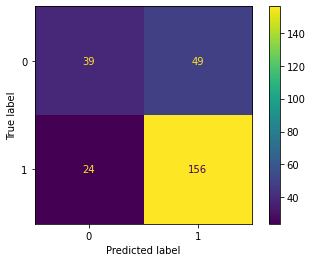

In [29]:
with mlflow.start_run():
    n_neighbors=5
    knn_model= KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    # train acc
    pred_train = knn_model.predict(X_train)
    train_score=accuracy_score(y_train, pred_train)
    
    cm=ConfusionMatrixDisplay.from_predictions( y_train, pred_train)
    cm.figure_.savefig('confusion_mat.png')
    mlflow.log_artifact('confusion_mat.png')
    mlflow.set_tag('mlflow.runName' , 'KNN Model')
    mlflow.log_param("neighbors",n_neighbors)
    mlflow.log_metric("Train score",train_score)
    mlflow.sklearn.log_model(knn_model,"model")